In [3]:
from collections import OrderedDict
import matplotlib.pyplot as plt

In [27]:
from sklearn import datasets
from sklearn.model_selection import train_test_split

iris = datasets.load_iris()

X = iris.data
Y = iris.target

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=.5)

In [5]:
from sklearn.neighbors import KNeighborsClassifier
N_NEIGHBORS = 10

In [28]:
def score_by_metric(metric, p=None):
    if p is not None:
        classifier = KNeighborsClassifier(n_neighbors=N_NEIGHBORS, metric=metric, p=p)
    else:
        classifier = KNeighborsClassifier(n_neighbors=N_NEIGHBORS, metric=metric)
    classifier.fit(X_train, y_train)
    return classifier.score(X_test, y_test)
    
metrics = [('minkowski', 2), ('minkowski', 4), ('euclidean',), ('chebyshev',)]

print('METRICS COMPARISON')
{metric: score_by_metric(*metric) for metric in metrics}

METRICS COMPARISON


{('chebyshev',): 0.95999999999999996,
 ('euclidean',): 0.94666666666666666,
 ('minkowski', 2): 0.94666666666666666,
 ('minkowski', 4): 0.95999999999999996}

OrderedDict([(10, 0.40000000000000002), (11, 0.63636363636363635), (12, 0.75), (13, 0.76923076923076927), (14, 0.7857142857142857), (15, 0.80000000000000004), (16, 0.8125), (17, 0.82352941176470584), (18, 0.83333333333333337), (19, 0.84210526315789469), (20, 0.84999999999999998), (21, 0.8571428571428571), (22, 0.86363636363636365), (23, 0.82608695652173914), (24, 0.83333333333333337), (25, 0.80000000000000004), (26, 0.76923076923076927), (27, 0.77777777777777779), (28, 0.75), (29, 0.75862068965517238), (30, 0.90000000000000002), (31, 0.90322580645161288), (32, 0.90625), (33, 0.90909090909090906), (34, 0.91176470588235292), (35, 0.91428571428571426), (36, 0.94444444444444442), (37, 0.94594594594594594), (38, 0.94736842105263153), (39, 0.94871794871794868), (40, 0.94999999999999996), (41, 0.95121951219512191), (42, 0.95238095238095233), (43, 0.95348837209302328), (44, 0.95454545454545459), (45, 0.9555555555555556), (46, 0.95652173913043481), (47, 0.95744680851063835), (48, 0.958333333333

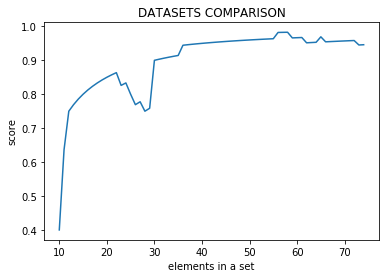

In [30]:
def score_by_dataset(rows):
    classifier = KNeighborsClassifier(n_neighbors=N_NEIGHBORS)
    classifier.fit(X_train[:rows], y_train[:rows])
    return classifier.score(X_test[:rows], y_test[:rows])

indices = range(10, len(X_train + 1))

results = {rows: score_by_dataset(rows) for rows in indices}
results = OrderedDict(sorted(results.items()))
print(results)

plt.plot(results.keys(), results.values())
plt.title('DATASETS COMPARISON')
plt.xlabel('elements in a set')
plt.ylabel('score')
plt.show()

OrderedDict([(1, 0.95999999999999996), (2, 0.93333333333333335), (3, 0.97333333333333338), (4, 0.95999999999999996), (5, 0.97333333333333338), (6, 0.95999999999999996), (7, 0.97333333333333338), (8, 0.94666666666666666), (9, 0.95999999999999996), (10, 0.94666666666666666), (11, 0.94666666666666666), (12, 0.92000000000000004), (13, 0.93333333333333335), (14, 0.93333333333333335), (15, 0.93333333333333335), (16, 0.93333333333333335), (17, 0.93333333333333335), (18, 0.94666666666666666), (19, 0.93333333333333335), (20, 0.94666666666666666), (21, 0.94666666666666666), (22, 0.94666666666666666), (23, 0.94666666666666666), (24, 0.94666666666666666), (25, 0.94666666666666666), (26, 0.94666666666666666), (27, 0.94666666666666666), (28, 0.92000000000000004), (29, 0.92000000000000004), (30, 0.92000000000000004), (31, 0.93333333333333335), (32, 0.90666666666666662), (33, 0.92000000000000004), (34, 0.90666666666666662), (35, 0.90666666666666662), (36, 0.89333333333333331), (37, 0.89333333333333331

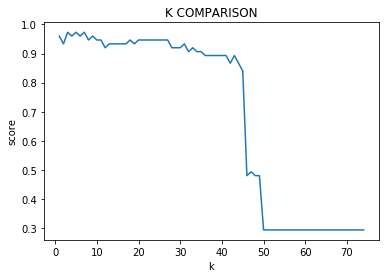

In [19]:
def score_by_k(k):
    classifier = KNeighborsClassifier(n_neighbors=k)
    classifier.fit(X_train, y_train)
    return classifier.score(X_test, y_test)

ks = range(1, len(X_train + 1))

results = {k: score_by_k(k) for k in ks}
results = OrderedDict(sorted(results.items()))
print(results)

plt.plot(results.keys(), results.values())
plt.title('K COMPARISON')
plt.xlabel('k')
plt.ylabel('score')
plt.show()